We will implement decision tree algorithm for Pima Indians Diabetes Database. The task is to predict whether a patient has diabetes or not based on some diagnostic measures. Let's create a decision tree model using Scikit-learn.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing the required libraries and modules
import numpy as np
import pandas as pd
import pydotplus
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from sklearn.tree import export_graphviz

from six import StringIO
from IPython.display import Image

In [3]:
mpg = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/auto-mpg.csv")     #Loading the dataset miles per galllon
mpg.head()                                                                             #Display the top five rows from the data set

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
#split dataset in features and target variable
y = mpg['mpg']
X = mpg.drop('mpg', axis='columns')
#X = X.drop('cylinders', axis='columns')
X = X.replace('?', 0)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)   # 70% training and 30% test

In [5]:
# Instantiate dt
dt = DecisionTreeRegressor(criterion="squared_error",max_depth=3, min_samples_leaf=0.1, random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.22


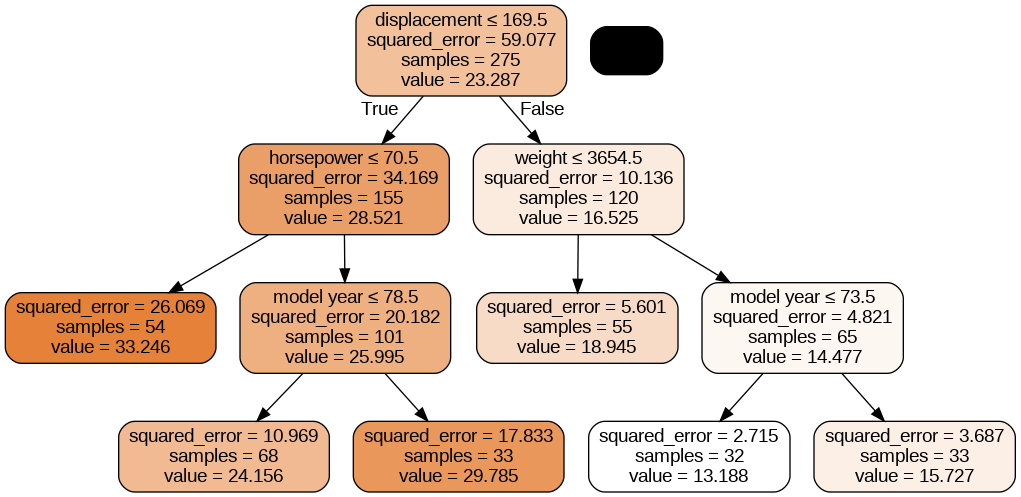

In [6]:
# Visualizing the decision tree
feature_col = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 	'model year', 	'origin']
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_col)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('mpg.png')
Image(graph.create_png())

We can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. The export_graphviz function converts the decision tree classifier into a dot file, and pydotplus converts this dot file to png or displayable form on Jupyter.